# explore coadd inputs

bounding boxes, calexp properties

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import time

import pandas
pandas.set_option('display.max_rows', 1000)

import lsst.daf.butler as dafButler

import lsst.geom
import lsst.afw.display as afwDisplay
afwDisplay.setDefaultBackend('matplotlib')

from astropy.wcs import WCS
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.time import Time

set up, start butler, identify coadd tract and patch

In [2]:
repo = 's3://butler-us-central1-panda-dev/dc2/butler-external.yaml'
collection = '2.2i/runs/DP0.2/v23_0_1_rc1/PREOPS-905/pilot_tract4431'

butler = dafButler.Butler(repo, collections=collection)

In [3]:
my_spherePoint = lsst.geom.SpherePoint(55.745834*lsst.geom.degrees,
                                       -32.269167*lsst.geom.degrees)
print(my_spherePoint)

skymap = butler.get('skyMap')
my_tract = skymap.findTract(my_spherePoint)
my_patch = my_tract.findPatch(my_spherePoint)
my_patch_id = my_tract.getSequentialPatchIndex(my_patch)
print('my_tract = ', my_tract)
print('my_patch = ', my_patch)
print('my_patch_id = ', my_patch_id)

dataId = {'band': 'i', 'tract': 4431, 'patch': 17}
deepCoadd = butler.get('deepCoadd', dataId=dataId)

(55.7458340000, -32.2691670000)
my_tract =  TractInfo(id=4431)
my_patch =  PatchInfo(index=Index2D(x=3, y=2))
my_patch_id =  17


identify coadd inputs

In [4]:
coadd_inputs = butler.get("deepCoadd_calexp.coaddInputs", dataId)

In [5]:
coadd_inputs_ccds_table = coadd_inputs.ccds.asAstropy()

In [6]:
coadd_inputs_ccds_table

<Table length=571>
    id     bbox_min_x bbox_min_y ... goodpix        weight         filter 
              pix        pix     ...                                      
  int64      int32      int32    ...  int32        float64         str32  
---------- ---------- ---------- ... -------- ------------------ ---------
 227922000          0          0 ...  1512880  1.745271720648272 i_sim_1.4
 951274001          0          0 ...  1577144  4.326007963992991 i_sim_1.4
 951274002          0          0 ...   154692  4.326007963992991 i_sim_1.4
 951274004          0          0 ... 10850788  4.326007963992991 i_sim_1.4
 951274005          0          0 ...  3615362  4.326007963992991 i_sim_1.4
 951274007          0          0 ...     3671  4.326007963992991 i_sim_1.4
 420782005          0          0 ...  9876512  4.539556638143641 i_sim_1.4
 420782008          0          0 ...   828705  4.539556638143641 i_sim_1.4
 420782009          0          0 ...    10928  4.539556638143641 i_sim_1.4
       ...        ...        ... ...      ...                ...       ...
 177481185          0          0 ...  3838815  4.156365107569587 i_sim_1.4
 177481188          0          0 ...  5898227  4.156365107569587 i_sim_1.4
 713248185          0          0 ...  8636392  1.386433458995704 i_sim_1.4
 713248188          0          0 ...  2513117  1.386433458995704 i_sim_1.4
 766973185          0          0 ...   868307  2.968475624175491 i_sim_1.4
 766973188          0          0 ...  1617664  2.968475624175491 i_sim_1.4
 512005186          0          0 ...  4905192 1.6253470177135352 i_sim_1.4
 512005187          0          0 ...  4151015 1.6253470177135352 i_sim_1.4
1229644186          0          0 ...  7639691 3.3980602754807645 i_sim_1.4
1229644187          0          0 ...  3425721 3.3980602754807645 i_sim_1.4

coadd bounding box demo

In [7]:
deepCoadd_bbox = butler.get('deepCoadd.bbox', dataId=dataId)
deepCoadd_wcs = butler.get('deepCoadd.wcs', dataId=dataId)

X0 = deepCoadd_bbox.beginX
Y0 = deepCoadd_bbox.beginY
X1 = deepCoadd_bbox.endX
Y1 = deepCoadd_bbox.endY
corners = [ deepCoadd_wcs.pixelToSky(X0, Y0), 
            deepCoadd_wcs.pixelToSky(X0, Y1), 
            deepCoadd_wcs.pixelToSky(X1, Y1), 
            deepCoadd_wcs.pixelToSky(X1, Y0) ]
print('corners of the deepCoadd from the wcs:')
print(corners)
print(' ')

corners_deepCoadd = np.zeros( (4,2), dtype='float' )
corners_deepCoadd[0][0] = corners[0].getRa().asDegrees()
corners_deepCoadd[1][0] = corners[1].getRa().asDegrees()
corners_deepCoadd[2][0] = corners[2].getRa().asDegrees()
corners_deepCoadd[3][0] = corners[3].getRa().asDegrees()
corners_deepCoadd[0][1] = corners[0].getDec().asDegrees()
corners_deepCoadd[1][1] = corners[1].getDec().asDegrees()
corners_deepCoadd[2][1] = corners[2].getDec().asDegrees()
corners_deepCoadd[3][1] = corners[3].getDec().asDegrees()
print('corners_deepCoadd as a numpy array:')
print(corners_deepCoadd)

print('corners_deepCoadd in hms dms notation:')
tempra = corners_deepCoadd[:,0]*u.degree
tempdec = corners_deepCoadd[:,1]*u.degree
tempcoords = SkyCoord(ra=tempra, dec=tempdec)
for coord in tempcoords:
    print(coord.to_string('hmsdms'))
del tempra,tempdec,tempcoords

del deepCoadd_bbox, deepCoadd_wcs
del X0,Y0,X1,Y1
del corners

corners of the deepCoadd from the wcs:
[SpherePoint(55.79016376401875*degrees, -32.322225378380246*degrees), SpherePoint(55.78981243851229*degrees, -32.088896548288034*degrees), SpherePoint(55.51440424131911*degrees, -32.088896406426095*degrees), SpherePoint(55.5140525810614*degrees, -32.32222523523597*degrees)]
 
corners_deepCoadd as a numpy array:
[[ 55.79016376 -32.32222538]
 [ 55.78981244 -32.08889655]
 [ 55.51440424 -32.08889641]
 [ 55.51405258 -32.32222524]]
corners_deepCoadd in hms dms notation:
03h43m09.63930336s -32d19m20.01136217s
03h43m09.55498524s -32d05m20.02757384s
03h42m03.45701792s -32d05m20.02706313s
03h42m03.37261945s -32d19m20.01084685s


getting corners for all calexps takes ~10 min, saved to file

In [8]:
# t1 = time.time()

# corners_all_ccds = np.zeros( (len(coadd_inputs_ccds_table),4,2), dtype='float' )

# for i, (ccd, visit) in enumerate(zip(coadd_inputs_ccds_table['ccd'], coadd_inputs_ccds_table['visit'])):
#     if i == 10:
#         t2 = time.time()
#         print('time remaining: ', ((t2-t1)/10.0) * (len(coadd_inputs_ccds_table)-10.0) )
    
#     calexp_bbox = butler.get('calexp.bbox', detector=ccd, visit=visit)
#     calexp_wcs = butler.get('calexp.wcs', detector=ccd, visit=visit)

#     X0 = calexp_bbox.beginX
#     Y0 = calexp_bbox.beginY
#     X1 = calexp_bbox.endX
#     Y1 = calexp_bbox.endY
    
#     corner1 = calexp_wcs.pixelToSky(X0, Y0)
#     corner2 = calexp_wcs.pixelToSky(X0, Y1)
#     corner3 = calexp_wcs.pixelToSky(X1, Y1)
#     corner4 = calexp_wcs.pixelToSky(X1, Y0)
    
#     corners_all_ccds[i][0][0] = corner1.getRa().asDegrees()
#     corners_all_ccds[i][1][0] = corner2.getRa().asDegrees()
#     corners_all_ccds[i][2][0] = corner3.getRa().asDegrees()
#     corners_all_ccds[i][3][0] = corner4.getRa().asDegrees()
#     corners_all_ccds[i][0][1] = corner1.getDec().asDegrees()
#     corners_all_ccds[i][1][1] = corner2.getDec().asDegrees()
#     corners_all_ccds[i][2][1] = corner3.getDec().asDegrees()
#     corners_all_ccds[i][3][1] = corner4.getDec().asDegrees()
    
#     del calexp_bbox, calexp_wcs
#     del corner1, corner2, corner3, corner4
#     del X0, X1, Y0, Y1

# t3 = time.time()
# print('time elapsed: ', t3-t1)
# del t1,t2,t3

# with open('explore_coadd_inputs/corners_all_ccds.dat', 'wb') as f:
#     np.save(f, corners_all_ccds)

In [9]:
with open('explore_coadd_inputs/corners_all_ccds.dat', 'rb') as f:
    corners_all_ccds = np.load(f)

In [10]:
print('corners of the first calexp as a numpy array:')
print(corners_all_ccds[0])

print('corners of the first calexp in hms dms notation:')
tempra = corners_all_ccds[0,:,0]*u.degree
tempdec = corners_all_ccds[0,:,1]*u.degree
tempcoords = SkyCoord(ra=tempra, dec=tempdec)
for coord in tempcoords:
    print(coord.to_string('hmsdms'))
del tempra,tempdec,tempcoords

corners of the first calexp as a numpy array:
[[ 55.53613413 -32.32159987]
 [ 55.54250098 -32.10015306]
 [ 55.27597783 -32.09489925]
 [ 55.2690443  -32.31637282]]
corners of the first calexp in hms dms notation:
03h42m08.6721913s -32d19m17.75952042s
03h42m10.20023478s -32d06m00.55101999s
03h41m06.23467854s -32d05m41.63729602s
03h41m04.57063138s -32d18m58.94214898s


plot all the bounding boxes

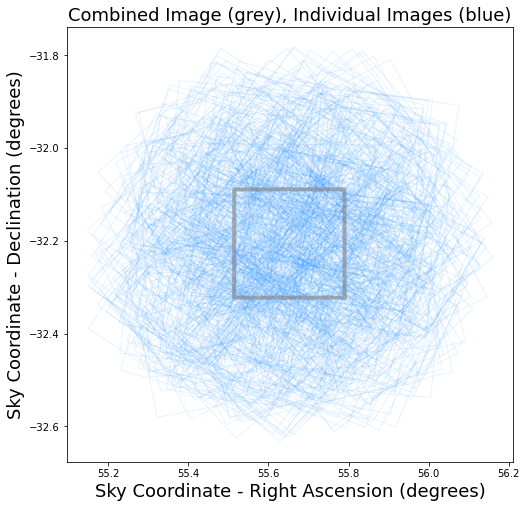

In [11]:
fig = plt.figure(figsize=(8,8))

for i in range(len(coadd_inputs_ccds_table)):    
    plt.plot( [corners_all_ccds[i][0][0], 
               corners_all_ccds[i][1][0], 
               corners_all_ccds[i][2][0], 
               corners_all_ccds[i][3][0], 
               corners_all_ccds[i][0][0]], 
              [corners_all_ccds[i][0][1], 
               corners_all_ccds[i][1][1], 
               corners_all_ccds[i][2][1], 
               corners_all_ccds[i][3][1],
               corners_all_ccds[i][0][1]],
              lw=1, alpha=0.1, color='dodgerblue' )

plt.plot( [corners_deepCoadd[0][0], 
           corners_deepCoadd[1][0], 
           corners_deepCoadd[2][0], 
           corners_deepCoadd[3][0], 
           corners_deepCoadd[0][0]], 
          [corners_deepCoadd[0][1], 
           corners_deepCoadd[1][1], 
           corners_deepCoadd[2][1], 
           corners_deepCoadd[3][1],
           corners_deepCoadd[0][1]],
          lw=4, alpha=0.6, color='grey' )

plt.xlabel( 'Sky Coordinate - Right Ascension (degrees)', fontsize=18 )
plt.ylabel( 'Sky Coordinate - Declination (degrees)', fontsize=18 )
# plt.xlim([])
# plt.ylim([])
plt.title( 'Combined Image (grey), Individual Images (blue)', fontsize=18 )
plt.savefig('explore_coadd_inputs/corners')
plt.show()

identify a subset of calexps

In [12]:
use_detector = coadd_inputs_ccds_table['ccd'][0]
use_visit = coadd_inputs_ccds_table['visit'][0]
calexp_meta = butler.get('calexp.metadata', detector=use_detector, visit=use_visit)
print( calexp_meta['FILTER'], calexp_meta['DATE-END'] )

i 2022-11-04T04:33:42.034


In [13]:
all_detectors = np.asarray( coadd_inputs_ccds_table['ccd'], dtype='int' )
all_visits = np.asarray( coadd_inputs_ccds_table['visit'], dtype='int' )

u_visits, ux = np.unique( all_visits, return_index = True )
u_dets = all_detectors[ux]

In [14]:
print(len(all_visits), len(u_visits))

571 161


In [15]:
# allmjds = np.zeros( len(u_visits), dtype='float' )
# for a in range(len(allmjds)):
#     calexp_meta = butler.get('calexp.metadata', detector=u_dets[a], visit=u_visits[a])
#     t = Time(calexp_meta['DATE-END'], format='isot', scale='utc')
#     allmjds[a] = t.mjd
#     del t

# fout = open('explore_coadd_inputs/dates_all_ccds.dat', 'w')
# for a in range(len(allmjds)):
#     fout.write('%10.3f \n' % allmjds[a])
# fout.close()

In [16]:
allmjds = np.loadtxt( 'explore_coadd_inputs/dates_all_ccds.dat', usecols=(0), dtype='float' )

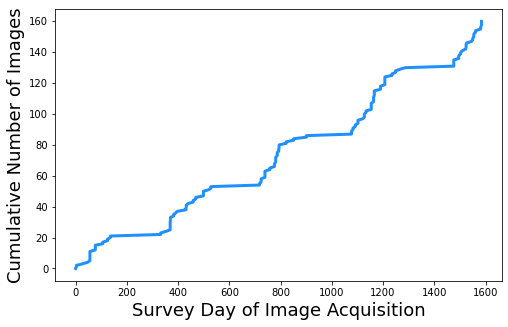

In [17]:
fig = plt.figure(figsize=(8,5))

sallmjds = np.sort(allmjds)
yaxis = np.arange( len(allmjds), dtype='int')

plt.plot( sallmjds-sallmjds[0], yaxis, ls='solid', lw=3, color='dodgerblue' )

plt.xlabel( 'Survey Day of Image Acquisition', fontsize=18 )
plt.ylabel( 'Cumulative Number of Images', fontsize=18 )
# plt.xlim([])
# plt.ylim([])
# plt.title( '', fontsize=18 )
plt.savefig('explore_coadd_inputs/dates')
plt.show()